# Gamelog

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colnames=["gamerID", "gameID", "nr.number", "THEpolygon.vertex_count",
          "THEpolygon.position_x", "THEpolygon.position_y", "THEpolygon.color[0]",
          "THEpolygon.color[1]", "THEpolygon.color[2]", "THEpolygon.radius", "seconds"] 
gamelog = pd.read_csv('gamelog.csv', names=colnames, header=None)

In [3]:
gamelog['dif']=gamelog['nr.number']-gamelog['THEpolygon.vertex_count']
gamelog['difAbs'] = gamelog['dif'].abs()

In [4]:
gamelog['color_list']= gamelog[['THEpolygon.color[0]','THEpolygon.color[1]','THEpolygon.color[2]']].values.tolist()

In [5]:
conditions = [
    (gamelog['color_list'].map(tuple).isin([(255, 102, 102)])),
    (gamelog['color_list'].map(tuple).isin([(102,255,102)])),
    (gamelog['color_list'].map(tuple).isin([(102,102,255)])),
    (gamelog['color_list'].map(tuple).isin([(255,255,102)])),
    (gamelog['color_list'].map(tuple).isin([(102,255,255)])),
    (gamelog['color_list'].map(tuple).isin([(255,178,102)])),
    (gamelog['color_list'].map(tuple).isin([(255,102,178)])),
    (gamelog['color_list'].map(tuple).isin([(178,102,255)]))]
choices = ['red', 'green', 'blue', 'yellow', 'teal', 'orange', 'pink', 'purple']
gamelog['color'] = np.select(conditions, choices, default='white')

In [6]:
gamelog['delta'] = (gamelog['seconds']-gamelog['seconds'].shift()).fillna(0)
gamelog.loc[gamelog['delta']<=0, 'delta'] = gamelog['seconds']

In [7]:
gamelog

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,seconds,dif,difAbs,color_list,color,delta
0,2189773,5576994,9,9,269,312,255,255,255,100,2.566,0,0,"[255, 255, 255]",white,2.566
1,2189773,5576994,7,6,1761,227,102,102,255,101,5.595,1,1,"[102, 102, 255]",blue,3.029
2,2189773,5576994,8,7,1571,789,255,178,102,87,8.770,1,1,"[255, 178, 102]",orange,3.175
3,2189773,5576994,8,8,181,200,102,255,102,134,10.159,0,0,"[102, 255, 102]",green,1.389
4,2189773,5576994,6,6,1478,589,255,102,178,89,12.424,0,0,"[255, 102, 178]",pink,2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,1685637,9991265,6,6,1503,305,178,102,255,132,84.453,0,0,"[178, 102, 255]",purple,1.540
1933,1685637,9991265,9,8,448,707,102,255,255,70,86.217,1,1,"[102, 255, 255]",teal,1.764
1934,1685637,9991265,5,5,152,549,255,255,255,98,87.888,0,0,"[255, 255, 255]",white,1.671
1935,1685637,9991265,4,4,600,408,255,255,255,115,88.760,0,0,"[255, 255, 255]",white,0.872


# Responses

In [8]:
Responses = pd.read_csv('Mindfullness_(Responses).csv')

In [9]:
Responses = Responses.replace('Men', 'male')
Responses = Responses.replace('Not at all', 0)
Responses = Responses.replace('A little', 1)
Responses = Responses.replace('Moderately', 2)
Responses = Responses.replace('Quite a bit', 3)
Responses = Responses.replace('Very much', 4)



In [10]:
for i in range(15):
    Responses.columns.values[i+5] = "S1Q" + str(i)
    Responses.columns.values[i+21] = "S2Q" + str(i)
    Responses["Q" + str(i)] = Responses[Responses.columns.values[i+21]].astype(int)-Responses[Responses.columns.values[i+5]].astype(int)


In [11]:
Responses.select_dtypes(include='number').mean().round(2)

Age                        25.25
S1Q0                        1.50
S1Q1                        1.00
S1Q2                        2.00
S1Q3                        0.75
S1Q4                        1.25
S1Q5                        1.62
S1Q6                        0.75
S1Q7                        1.88
S1Q8                        1.38
S1Q9                        0.75
S1Q10                       1.88
S1Q11                       2.12
S1Q12                       1.50
S1Q13                       1.62
S1Q14                       0.50
Player ID             4514731.12
S2Q0                        2.00
S2Q1                        1.50
S2Q2                        2.88
S2Q3                        1.88
S2Q4                        2.00
S2Q5                        2.75
S2Q6                        1.88
S2Q7                        2.50
S2Q8                        2.50
S2Q9                        1.88
S2Q10                       2.75
S2Q11                       2.38
S2Q12                       1.75
S2Q13     

## Clean data

In [12]:
list(set(gamelog['gamerID'].unique()).intersection(Responses['Player ID'].unique()))

[9274304, 7226659, 1685637, 8714568, 2189773, 929230, 6092123]

In [13]:
Responses['Player ID'].unique()

array([   5555, 2189773, 7226659, 1685637, 6092123, 9274304, 8714568,
        929230], dtype=int64)

In [14]:
gamelog['gamerID'].unique()

array([2189773, 7226659, 4705656, 6092123, 9282881, 9274304, 8714568,
        929230, 1685637], dtype=int64)

In [15]:
gamelog.join(Responses.set_index('Player ID'), on='gamerID')

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,...,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14
0,2189773,5576994,9,9,269,312,255,255,255,100,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
1,2189773,5576994,7,6,1761,227,102,102,255,101,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
2,2189773,5576994,8,7,1571,789,255,178,102,87,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
3,2189773,5576994,8,8,181,200,102,255,102,134,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
4,2189773,5576994,6,6,1478,589,255,102,178,89,...,1.0,0.0,2.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,1685637,9991265,6,6,1503,305,178,102,255,132,...,2.0,2.0,0.0,2.0,3.0,2.0,2.0,2.0,0.0,4.0
1933,1685637,9991265,9,8,448,707,102,255,255,70,...,2.0,2.0,0.0,2.0,3.0,2.0,2.0,2.0,0.0,4.0
1934,1685637,9991265,5,5,152,549,255,255,255,98,...,2.0,2.0,0.0,2.0,3.0,2.0,2.0,2.0,0.0,4.0
1935,1685637,9991265,4,4,600,408,255,255,255,115,...,2.0,2.0,0.0,2.0,3.0,2.0,2.0,2.0,0.0,4.0


In [16]:
cleanLog= gamelog[gamelog['gamerID'].isin(Responses['Player ID'].unique().tolist())]

In [17]:
cleanLog = cleanLog[~cleanLog['gameID'].isin(cleanLog.groupby('gameID')['dif'].value_counts().unstack(fill_value=0)[cleanLog.groupby('gameID')['dif'].value_counts().unstack(fill_value=0)[0]==0].index.tolist())]

In [18]:
cleanLog = cleanLog[~cleanLog['gameID'].isin(cleanLog.groupby('gameID').count()['delta'][cleanLog.groupby('gameID').count()['delta']<6].index.tolist())]

In [19]:
Responses['Player ID'].unique().tolist()

[5555, 2189773, 7226659, 1685637, 6092123, 9274304, 8714568, 929230]

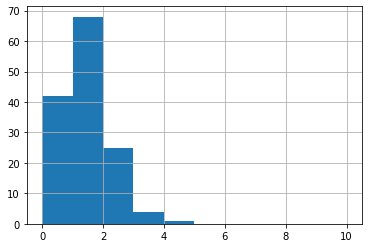

In [20]:
cleanLog.groupby('gameID').max()['dif'].hist(range=[0, 10])

In [21]:
cleanLog

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,seconds,dif,difAbs,color_list,color,delta
0,2189773,5576994,9,9,269,312,255,255,255,100,2.566,0,0,"[255, 255, 255]",white,2.566
1,2189773,5576994,7,6,1761,227,102,102,255,101,5.595,1,1,"[102, 102, 255]",blue,3.029
2,2189773,5576994,8,7,1571,789,255,178,102,87,8.770,1,1,"[255, 178, 102]",orange,3.175
3,2189773,5576994,8,8,181,200,102,255,102,134,10.159,0,0,"[102, 255, 102]",green,1.389
4,2189773,5576994,6,6,1478,589,255,102,178,89,12.424,0,0,"[255, 102, 178]",pink,2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,1685637,9991265,6,6,1503,305,178,102,255,132,84.453,0,0,"[178, 102, 255]",purple,1.540
1933,1685637,9991265,9,8,448,707,102,255,255,70,86.217,1,1,"[102, 255, 255]",teal,1.764
1934,1685637,9991265,5,5,152,549,255,255,255,98,87.888,0,0,"[255, 255, 255]",white,1.671
1935,1685637,9991265,4,4,600,408,255,255,255,115,88.760,0,0,"[255, 255, 255]",white,0.872


# Vigade jaotus

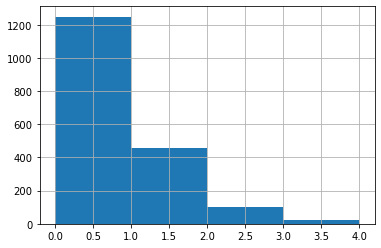

In [22]:
cleanLog['difAbs'].hist(bins =4)

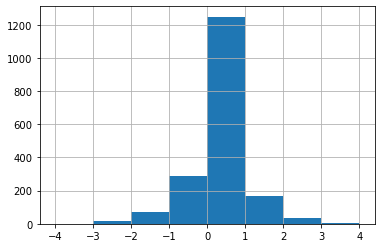

In [23]:
cleanLog['dif'].hist(bins =8)

(array([  0.,   7.,  27., 161.,  22.,   4.,   0.,   0.]),
 array([-3.   , -2.125, -1.25 , -0.375,  0.5  ,  1.375,  2.25 ,  3.125,
         4.   ]),
 <a list of 8 Patch objects>)

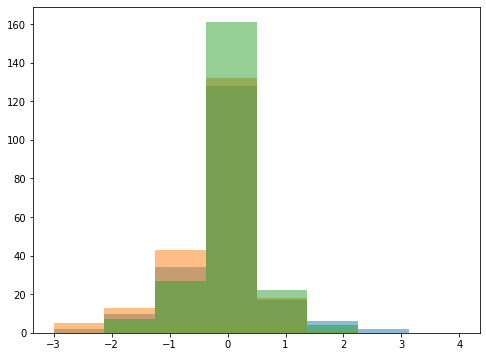

In [24]:
plt.figure(figsize=(8,6))
plt.hist(cleanLog[cleanLog['color']=='red']['dif'], bins=8, alpha=0.5, label="red",range=[-3, 4])
plt.hist(cleanLog[cleanLog['color']=='blue']['dif'], bins=8, alpha=0.5, label="blue",range=[-3, 4])
plt.hist(cleanLog[cleanLog['color']=='green']['dif'], bins=8, alpha=0.5, label="green",range=[-3, 4])

In [25]:
#cleanLog[(cleanLog['color']==c)&(cleanLog['nr.number']==3)]['dif']

NameError: name 'c' is not defined

In [26]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)
for c in cleanLog['color'].unique().tolist():
    data = cleanLog[(cleanLog['color']==c)&(cleanLog['nr.number']==3)]['dif']
    kde = gaussian_kde( data )
    dist_space = linspace( -4,4, 9 )
    plt.plot( dist_space, kde(dist_space), color =c , label=c)
    #plt.yscale('log')
    ax = plt.gca()
    ax.set_facecolor('xkcd:grey')
plt.xlabel("Error ", size=14)
plt.ylabel("Probability", size=14)
plt.title("Errors distribution by color")
plt.legend(loc='upper right')
plt.show()

LinAlgError: singular matrix

<Figure size 1200x800 with 0 Axes>

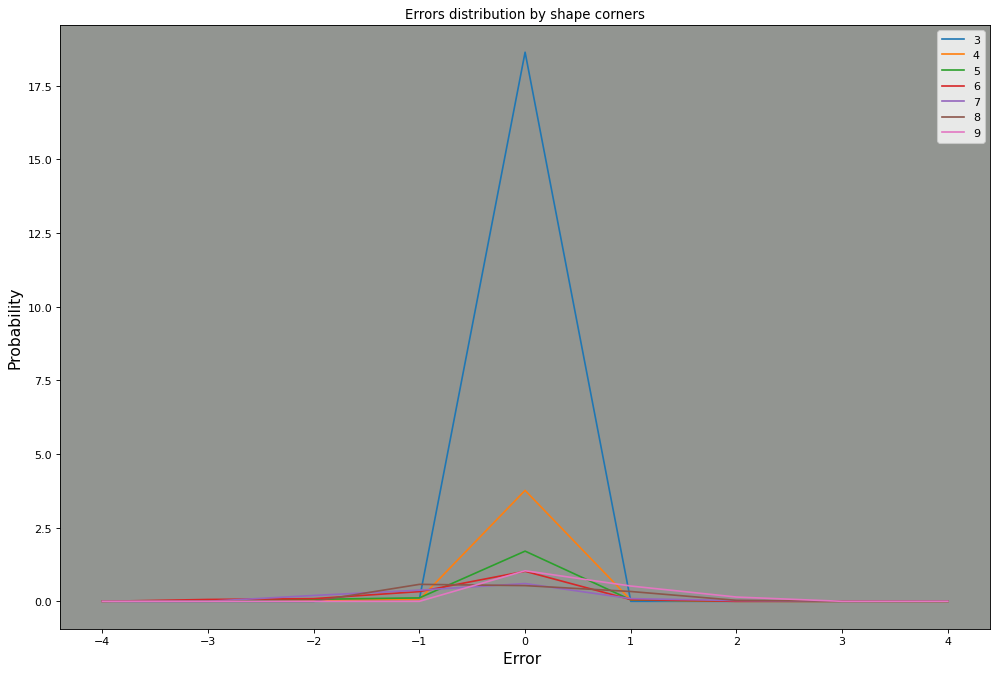

In [28]:
figure(figsize=(15, 10), dpi=80)
Nlist = cleanLog['THEpolygon.vertex_count'].unique().tolist()
Nlist.sort()
for c in Nlist:
    data = cleanLog[cleanLog['nr.number']==c]['dif']
    kde = gaussian_kde( data )
    dist_space = linspace( -4,4, 9 )
    plt.plot( dist_space, kde(dist_space),  label=c)
    #plt.yscale('log')
    ax = plt.gca()
    ax.set_facecolor('xkcd:grey')
plt.xlabel("Error ", size=14)
plt.ylabel("Probability", size=14)
plt.title("Errors distribution by shape corners")
plt.legend(loc='upper right')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

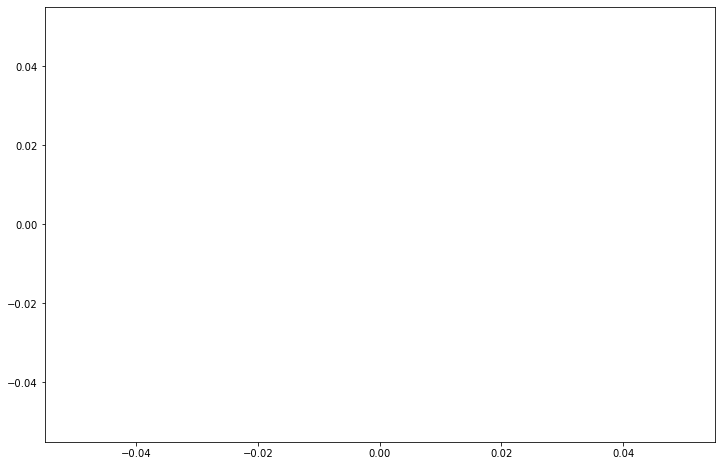

In [32]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = cleanLog[(cleanLog['color']==c)&(cleanLog['nr.number']==3)]['dif'].value_counts()
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()

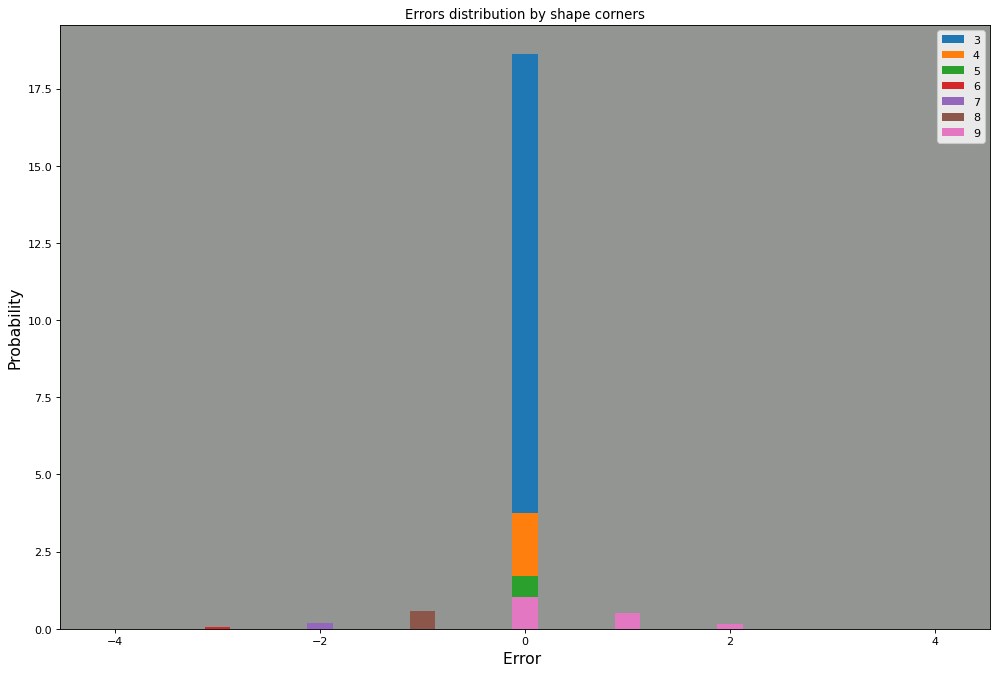

In [33]:
figure(figsize=(15, 10), dpi=80)
Nlist = cleanLog['THEpolygon.vertex_count'].unique().tolist()
Nlist.sort()
barWidth = 0.25

br1 = np.arange(len(dist_space))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

for c in Nlist:
    data = cleanLog[cleanLog['nr.number']==c]['dif']
    kde = gaussian_kde( data )
    if 
    br = [x + barWidth for x in br]
    dist_space = linspace( -4,4, 9 )
    plt.bar( dist_space, kde(dist_space),  label=c,width = barWidth)
    #plt.yscale('log')
    ax = plt.gca()
    ax.set_facecolor('xkcd:grey')
plt.xlabel("Error ", size=14)
plt.ylabel("Probability", size=14)
plt.title("Errors distribution by shape corners")
plt.legend(loc='upper right')
plt.show()

In [37]:
kde(dist_space)

array([6.44257852e-64, 2.89801828e-36, 1.63784783e-16, 1.16299275e-04,
       1.03761402e+00, 5.18910516e-01, 1.45315971e-01, 1.62818985e-05,
       2.29298696e-17])

In [35]:
dist_space

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

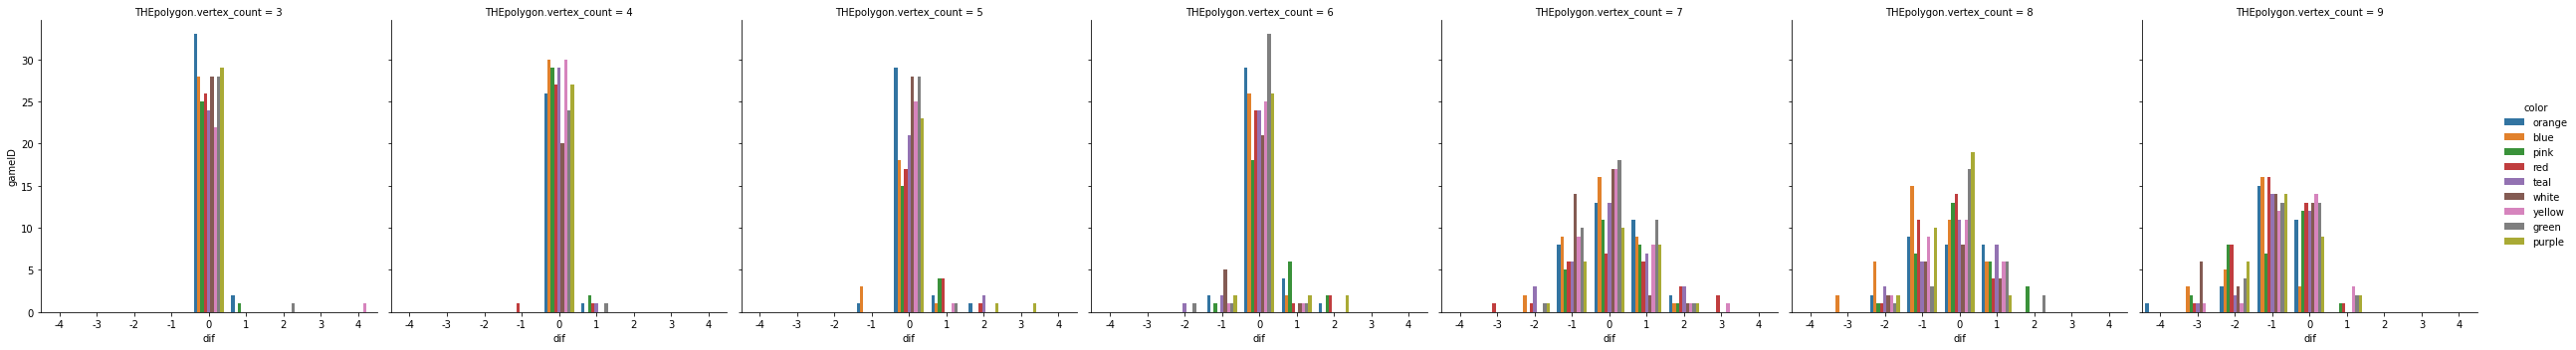

In [54]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df =  cleanLog.groupby(['dif','color','THEpolygon.vertex_count']).count().reset_index()

sns.factorplot(x="dif", y="gameID", hue="color", col="THEpolygon.vertex_count", data=df, kind="bar")
plt.show()

In [52]:
cleanLog.groupby(['dif','color','THEpolygon.vertex_count']).count()

gamerID  gameID  nr.number  \
dif color  THEpolygon.vertex_count                               
-4  orange 9                              1       1          1   
-3  blue   8                              2       2          2   
           9                              3       3          3   
    pink   9                              2       2          2   
    red    7                              1       1          1   
...                                     ...     ...        ...   
 2  yellow 7                              1       1          1   
 3  purple 5                              1       1          1   
    red    7                              2       2          2   
    yellow 7                              1       1          1   
 4  yellow 3                              1       1          1   

                                    THEpolygon.position_x  \
dif color  THEpolygon.vertex_count                          
-4  orange 9                                            1   
-3  blue   8                                            2   
           9                                            3   
    pink   9                                            2   
    red    7                                            1   
...                                                   ...   
 2  yellow 7                                            1   
 3  purple 5                                            1   
    red    7                                            2   
    yellow 7                                            1   
 4  yellow 3                                            1   

                                    THEpolygon.position_y  \
dif color  THEpolygon.vertex_count                          
-4  orange 9                                            1   
-3  blue   8                                            2   
           9                                            3   
    pink   9                                            2   
    red    7                                            1   
...                                                   ...   
 2  yellow 7                                            1   
 3  purple 5                                            1   
    red    7                                            2   
    yellow 7                                            1   
 4  yellow 3                                            1   

                                    THEpolygon.color[0]  THEpolygon.color[1]  \
dif color  THEpolygon.vertex_count                                             
-4  orange 9                                          1                    1   
-3  blue   8                                          2                    2   
           9                                          3                    3   
    pink   9                                          2                    2   
    red    7                                          1                    1   
...                                                 ...                  ...   
 2  yellow 7                                          1                    1   
 3  purple 5                                          1                    1   
    red    7                                          2                    2   
    yellow 7                                          1                    1   
 4  yellow 3                                          1                    1   

                                    THEpolygon.color[2]  THEpolygon.radius  \
dif color  THEpolygon.vertex_count                                           
-4  orange 9                                          1                  1   
-3  blue   8                                          2                  2   
           9                                          3                  3   
    pink   9                                          2                  2   
    red    7                                          1                  1   
..

In [42]:
cleanLog

,gamerID,gameID,nr.number,THEpolygon.vertex_count,THEpolygon.position_x,THEpolygon.position_y,THEpolygon.color[0],THEpolygon.color[1],THEpolygon.color[2],THEpolygon.radius,seconds,dif,difAbs,color_list,color,delta
0,2189773,5576994,9,9,269,312,255,255,255,100,2.566,0,0,"[255, 255, 255]",white,2.566
1,2189773,5576994,7,6,1761,227,102,102,255,101,5.595,1,1,"[102, 102, 255]",blue,3.029
2,2189773,5576994,8,7,1571,789,255,178,102,87,8.770,1,1,"[255, 178, 102]",orange,3.175
3,2189773,5576994,8,8,181,200,102,255,102,134,10.159,0,0,"[102, 255, 102]",green,1.389
4,2189773,5576994,6,6,1478,589,255,102,178,89,12.424,0,0,"[255, 102, 178]",pink,2.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,1685637,9991265,6,6,1503,305,178,102,255,132,84.453,0,0,"[178, 102, 255]",purple,1.540
1933,1685637,9991265,9,8,448,707,102,255,255,70,86.217,1,1,"[102, 255, 255]",teal,1.764
1934,1685637,9991265,5,5,152,549,255,255,255,98,87.888,0,0,"[255, 255, 255]",white,1.671
1935,1685637,9991265,4,4,600,408,255,255,255,115,88.760,0,0,"[255, 255, 255]",white,0.872
